In [4]:
import pandas as pd

In [7]:
dd = pd.read_csv(r"C:\Users\vasavi\Downloads\ratings.csv")

In [12]:
len(dd["userId"].unique())

610

In [13]:
dd.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [199]:
dd.shape

(100836, 4)

In [14]:
df = pd.read_csv(r"C:\Users\vasavi\Downloads\movies.csv")

In [200]:
df.shape

(9742, 3)

In [15]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
dc = pd.read_csv(r"C:\Users\vasavi\Downloads\tags.csv")

In [17]:
dc.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
ds = pd.read_csv(r"C:\Users\vasavi\Downloads\links.csv")

In [19]:
ds.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [202]:
dd.merge(bb, on = 'movieId', how = 'inner').merge(df, on = 'movieId', how = 'inner').groupby('title')['rating_x'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Bad Boys (1995)                      51
Army of Darkness (1993)              51
The Devil's Advocate (1997)          51
Mulholland Drive (2001)              51
Training Day (2001)                  51
Name: rating_x, Length: 436, dtype: int64

In [32]:
aa = dd.merge(df, on = 'movieId', how = 'inner').merge(dc, on ='userId', how = 'inner' )

In [222]:
aa[aa['title'] == "Matrix, The (1999)"]['tag'].unique()

array(['Al Pacino', 'gangster', 'mafia', ..., 'ocean', 'Stock Market',
       'Everything you want is here'], dtype=object)

In [224]:
aa[aa['title'] == "Terminator 2: Judgment Day (1991)"]['rating'].mean()

3.967585403726708

<Axes: ylabel='Density'>

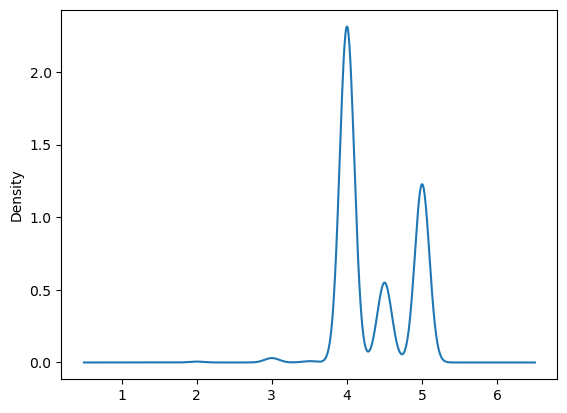

In [223]:
aa[aa['title'] == 'Fight Club (1999)']['rating'].plot(kind = 'kde')

In [225]:
cc = aa.merge(bb, left_on = 'movieId_x', right_on = 'movieId' ,how = 'inner')

In [226]:
cc.groupby('title')['rating_x'].mean().sort_values(ascending = False).head(20)

title
Dead Man Walking (1995)                                 4.924433
Sound of Music, The (1965)                              4.901365
Grand Budapest Hotel, The (2014)                        4.861318
Magnolia (1999)                                         4.848837
Casablanca (1942)                                       4.804904
Harry Potter and the Prisoner of Azkaban (2004)         4.767660
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.756492
Sense and Sensibility (1995)                            4.722105
L.A. Confidential (1997)                                4.720321
Graduate, The (1967)                                    4.686774
Fugitive, The (1993)                                    4.673455
Harry Potter and the Goblet of Fire (2005)              4.665650
Schindler's List (1993)                                 4.654129
Godfather, The (1972)                                   4.638858
When Harry Met Sally... (1989)                          4.636268
Star Trek: First Co

In [227]:
bb= dd.groupby('movieId')['rating'].count().sort_values(ascending = False)[:436]

In [160]:
dd.merge(bb, on = 'movieId', how = 'inner').merge(df, on = 'movieId', how = 'inner').groupby('title')['rating_x'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Bad Boys (1995)                      51
Army of Darkness (1993)              51
The Devil's Advocate (1997)          51
Mulholland Drive (2001)              51
Training Day (2001)                  51
Name: rating_x, Length: 436, dtype: int64

In [229]:
abc = dd.merge(bb, on = 'movieId', how = 'inner').merge(df, on = 'movieId', how = 'inner')

In [215]:
import re

In [232]:
abc['SCI-FI'] = abc['genres'].apply(lambda x:"".join(re.findall(r'Sci-Fi',x)))

In [236]:
abc = abc[abc['SCI-FI']=='Sci-Fi']

In [239]:
abc.groupby('title')['rating_x'].count().sort_values(ascending = False)

title
Matrix, The (1999)                                       278
Star Wars: Episode IV - A New Hope (1977)                251
Jurassic Park (1993)                                     238
Terminator 2: Judgment Day (1991)                        224
Star Wars: Episode V - The Empire Strikes Back (1980)    211
                                                        ... 
Deadpool (2016)                                           54
Space Jam (1996)                                          53
Johnny Mnemonic (1995)                                    53
Wild Wild West (1999)                                     53
X-Men: The Last Stand (2006)                              52
Name: rating_x, Length: 88, dtype: int64

In [249]:
im = df.merge(ds, on = 'movieId', how = 'inner')

In [250]:
im

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [243]:
import requests
from bs4 import BeautifulSoup

In [258]:
im[im['title']== 'Shawshank Redemption, The (1994)']

,movieId,title,genres,imdbId,tmdbId
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0


In [262]:
im[im['title']== 'Inception (2010)']

,movieId,title,genres,imdbId,tmdbId
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1375666,27205.0
